In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
column_names = [
    "engine_id", "cycle",
    "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1,22)]
df = pd.read_csv("/content/drive/MyDrive/train_FD001.txt", sep=" ", header=None)
df = df.dropna(axis=1, how="all")
df.columns = column_names

print("Shape:", df.shape)
print("\nData Info:\n")
print(df.info())
print("First 5 rows:")
df.head()

Shape: (20631, 26)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

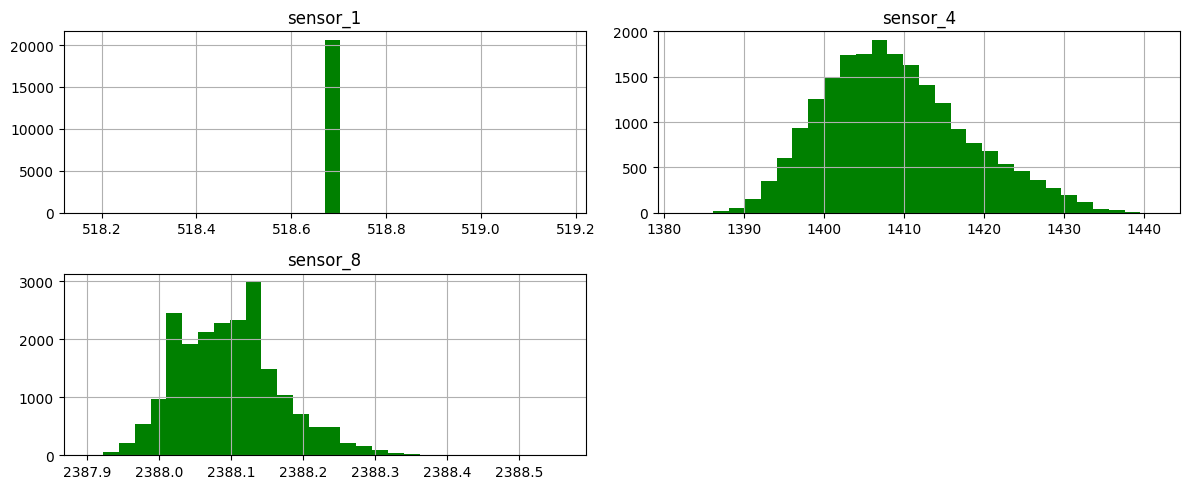


Missing values per column:

engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64


In [42]:
sensors_to_plot = ["sensor_1", "sensor_4", "sensor_8"]

df[sensors_to_plot].hist(figsize=(12, 5), bins=30,color="green")
plt.tight_layout()
plt.show()

print("\nMissing values per column:\n")
print(df.isnull().sum())


#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [43]:
df["sensor9_mean"] = df.groupby("engine_id")["sensor_9"].transform("mean")
df["sensor9_std"] = df.groupby("engine_id")["sensor_9"].transform("std")

df["sensor9_rollmean"] = df.groupby("engine_id")["sensor_9"].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

print(df.head(12)[["engine_id", "cycle", "sensor_9", "sensor9_mean", "sensor9_std", "sensor9_rollmean"]])


    engine_id  cycle  sensor_9  sensor9_mean  sensor9_std  sensor9_rollmean
0           1      1   9046.19   9048.265833     4.911853       9046.190000
1           1      2   9044.07   9048.265833     4.911853       9045.130000
2           1      3   9052.94   9048.265833     4.911853       9047.733333
3           1      4   9049.48   9048.265833     4.911853       9048.170000
4           1      5   9055.15   9048.265833     4.911853       9049.566000
5           1      6   9049.68   9048.265833     4.911853       9050.264000
6           1      7   9059.13   9048.265833     4.911853       9053.276000
7           1      8   9040.80   9048.265833     4.911853       9050.848000
8           1      9   9046.46   9048.265833     4.911853       9050.244000
9           1     10   9051.70   9048.265833     4.911853       9049.554000
10          1     11   9049.61   9048.265833     4.911853       9049.540000
11          1     12   9049.37   9048.265833     4.911853       9047.588000


#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

   engine_id  cycle  sensor_1  sensor_2  sensor_3  sensor_4      sensor_5  \
0          1      1       0.0 -1.721725 -0.134255 -0.925936 -1.776357e-15   
1          1      2       0.0 -1.061780  0.211528 -0.643726 -1.776357e-15   
2          1      3       0.0 -0.661813 -0.413166 -0.525953 -1.776357e-15   
3          1      4       0.0 -0.661813 -1.261314 -0.784831 -1.776357e-15   
4          1      5       0.0 -0.621816 -1.251528 -0.301518 -1.776357e-15   

   sensor_6  sensor_7  sensor_8  ...  sensor_12  sensor_13  sensor_14  \
0  0.141683  1.121141 -0.516338  ...   0.334262  -1.058890  -0.269071   
1  0.141683  0.431930 -0.798093  ...   1.174899  -0.363646  -0.642845   
2  0.141683  1.008155 -0.234584  ...   1.364721  -0.919841  -0.551629   
3  0.141683  1.222827  0.188048  ...   1.961302  -0.224597  -0.520176   
4  0.141683  0.714393 -0.516338  ...   1.052871  -0.780793  -0.521748   

   sensor_15     sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  \
0  -0.603816 -1.387779e-

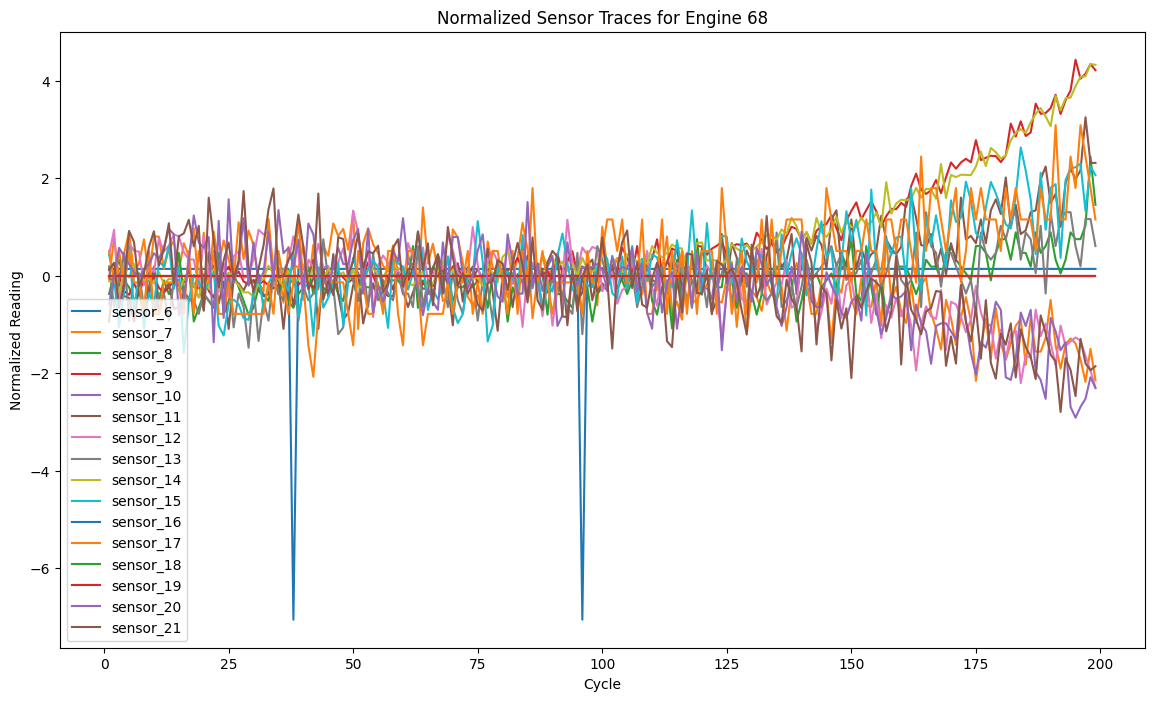

In [44]:
from sklearn.preprocessing import StandardScaler

# Identify only sensor columns
sensor_cols = [col for col in df.columns if col.startswith("sensor_")]

# Normalize sensor data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[sensor_cols])

# Create normalized DataFrame
df_norm = pd.DataFrame(scaled_data, columns=sensor_cols)
df_norm.insert(0, "engine_id", df["engine_id"])
df_norm.insert(1, "cycle", df["cycle"])

# Show results
print(df_norm.head())
print("\nMeans (should be ~0):\n", df_norm[sensor_cols].mean().round(3))
print("\nStds (should be ~1):\n", df_norm[sensor_cols].std().round(3))

# --- Optional Visualization ---
engine_id = np.random.choice(df['engine_id'].unique())
sample = df_norm[df_norm['engine_id'] == engine_id]
plt.figure(figsize=(14,8))
for col in sensor_cols[5:]:   # First 5 sensors for example
    plt.plot(sample['cycle'], sample[col], label=col)
plt.title(f"Normalized Sensor Traces for Engine {engine_id}")
plt.xlabel("Cycle")
plt.ylabel("Normalized Reading")
plt.legend()
plt.show()

#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.

In [45]:
def generate_sequences(data, sensors, window_size=30):
    sequences = []
    engine_ids = []
    cycles = []

    for engine_id, group in data.groupby("engine_id"):
        group = group.reset_index(drop=True)
        values = group[sensors].values

        for i in range(len(group) - window_size + 1):
            sequences.append(values[i:i+window_size])
            engine_ids.append(engine_id)
            cycles.append(group.loc[i+window_size-1, "cycle"])

    return np.array(sequences), engine_ids, cycles

seq_array, engine_list, cycle_list = generate_sequences(df, sensor_cols, window_size=30)

id_df = pd.DataFrame({"engine_id": engine_list, "cycle": cycle_list})
id_df.to_csv("sequence_identifiers.csv", index=False)

print("Sequence array shape:", seq_array.shape)
print("\nFirst sequence example:\n", seq_array[0])

Sequence array shape: (17731, 30, 21)

First sequence example:
 [[5.18670e+02 6.41820e+02 1.58970e+03 1.40060e+03 1.46200e+01 2.16100e+01
  5.54360e+02 2.38806e+03 9.04619e+03 1.30000e+00 4.74700e+01 5.21660e+02
  2.38802e+03 8.13862e+03 8.41950e+00 3.00000e-02 3.92000e+02 2.38800e+03
  1.00000e+02 3.90600e+01 2.34190e+01]
 [5.18670e+02 6.42150e+02 1.59182e+03 1.40314e+03 1.46200e+01 2.16100e+01
  5.53750e+02 2.38804e+03 9.04407e+03 1.30000e+00 4.74900e+01 5.22280e+02
  2.38807e+03 8.13149e+03 8.43180e+00 3.00000e-02 3.92000e+02 2.38800e+03
  1.00000e+02 3.90000e+01 2.34236e+01]
 [5.18670e+02 6.42350e+02 1.58799e+03 1.40420e+03 1.46200e+01 2.16100e+01
  5.54260e+02 2.38808e+03 9.05294e+03 1.30000e+00 4.72700e+01 5.22420e+02
  2.38803e+03 8.13323e+03 8.41780e+00 3.00000e-02 3.90000e+02 2.38800e+03
  1.00000e+02 3.89500e+01 2.33442e+01]
 [5.18670e+02 6.42350e+02 1.58279e+03 1.40187e+03 1.46200e+01 2.16100e+01
  5.54450e+02 2.38811e+03 9.04948e+03 1.30000e+00 4.71300e+01 5.22860e+02
  2.3